In [1]:
from hyperopt import hp

In [2]:
import numpy as np
def branin(params):
    x1 = params[0]
    x2 = params[1]
    a = 1.
    b = 5.1 / (4*(np.pi**2))
    c = 5 / np.pi
    r = 6
    s = 10.
    t = 1. / (8.*np.pi)
    ret  = a*(x2-b*(x1**2)+c*x1-r)**2+s*(1-t)*np.cos(x1)+s
    return ret

In [3]:
space = [hp.uniform('x1', 0, 15), hp.uniform('x2', -5, 15)]

In [4]:
from hyperopt import fmin, tpe, hp, Trials
trials = Trials()
best = fmin(fn=branin,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials)
print(best)

{'x1': 9.62236776524308, 'x2': 1.131212739432562}


In [5]:
y_list = list()

for i in range(50):
    y_list.append(list())
    
for j in range(10):
    y_train = list()
    print ('Running %d episode' % (j + 1))
    trials = Trials()
    best = fmin(fn=branin, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
    for i in range(50):
       y_train.append(trials.results[i]['loss'])
    
    
    for idx in range(len(y_train)):
        if idx == 0:
            y_list[idx].append(y_train[idx])
        else:
            y_list[idx].append(np.min(y_train[:idx]))

Running 1 episode
Running 2 episode
Running 3 episode
Running 4 episode
Running 5 episode
Running 6 episode
Running 7 episode
Running 8 episode
Running 9 episode
Running 10 episode


In [6]:
def return_mean_std(y_list):
    mean_list = list()
    std_list = list()
    for one_list in y_list:
        mean_list.append(np.mean(one_list))
        std_list.append(np.std(one_list))
    return mean_list, std_list
mean_list_TPA, std_list_TPA = return_mean_std(y_list)

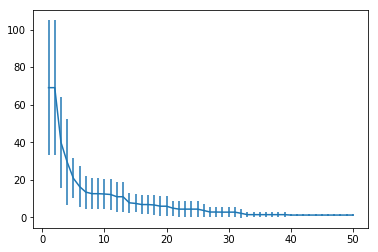

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
x_TPA = [i+1 for i in range(len(y_list))]

plt.errorbar(x_TPA, mean_list_TPA, yerr = std_list_TPA, fmt = '-')

plt.show()

In [8]:
import pickle
tpa_dict = {}
tpa_dict['y_list'] = y_list
with open('tpa.pkl','wb') as file:
    pickle.dump(tpa_dict, file)

In [9]:
with open('tpa.pkl', 'rb') as pickle_file:
    data1 = pickle.load(pickle_file)

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
def plot_data(mean_list, std_list, legend_list, color_list, y_label, x_label, title, legend_setting, a):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    x = [i + 1 for i in range(len(mean_list[0]))]
    for i in range(len(mean_list)):
        legend = legend_list[i]
        one_color = color_list[i]
        one_mean = mean_list[i]
        one_std = std_list[i]
        plt.errorbar(x, one_mean, yerr = one_std, fmt = '-', color = one_color, label = legend)
        
    if legend_setting == 'outside':  
        plt.legend(bbox_to_anchor=(a, 1), loc='upper right', ncol=1)
    else:
        plt.legend()
    plt.ylim(0, 60)
    plt.show()

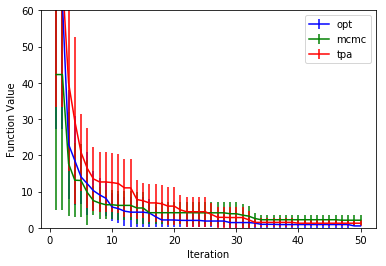

In [14]:
mean_list = list()
std_list = list()
legend_list = list()
with open('opt.pkl', 'rb') as pickle_file:
    opt_res = pickle.load(pickle_file)
mean_list_1, std_list_1 = return_mean_std(opt_res['y_list'])
mean_list.append(mean_list_1)
std_list.append(std_list_1)

with open('branin_exp_0.pkl', 'rb') as pickle_file:
    exp_0_res = pickle.load(pickle_file)
mean_list_1, std_list_1 = return_mean_std(exp_0_res['y_list'])
mean_list.append(mean_list_1)
std_list.append(std_list_1)

with open('tpa.pkl', 'rb') as pickle_file:
    tpa_res = pickle.load(pickle_file)
mean_list_1, std_list_1 = return_mean_std(tpa_res['y_list'])
mean_list.append(mean_list_1)
std_list.append(std_list_1)

legend_list = [r'opt',r'mcmc',r'tpa']

color_list = ['b','g','r']
y_label = 'Function Value'
x_label = 'Iteration'
title = ''

plot_data(mean_list, std_list, legend_list, color_list, y_label, x_label, title, legend_setting = 'None', a = 0)